# Heart Disease Prediction
                                                                                     Sinem Çevik       /     20180808026

In [1]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

import pandas as pd 
import numpy as np

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection

# Data Preprocessing
### Import - Discovery - Preparation

In [2]:
filename=open(r'C:\Users\Sinem Çevik\Desktop\heart_disease_health_indicators_BRFSS2015.csv')
df = pd.read_csv(filename)

In [4]:
df.isnull().values.any()

False

In [3]:
df.describe().T[1:]

,count,mean,std,min,25%,50%,75%,max
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
Diabetes,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0
Veggies,253680.0,0.811420,0.391175,0.0,1.0,1.0,1.0,1.0


<AxesSubplot:>

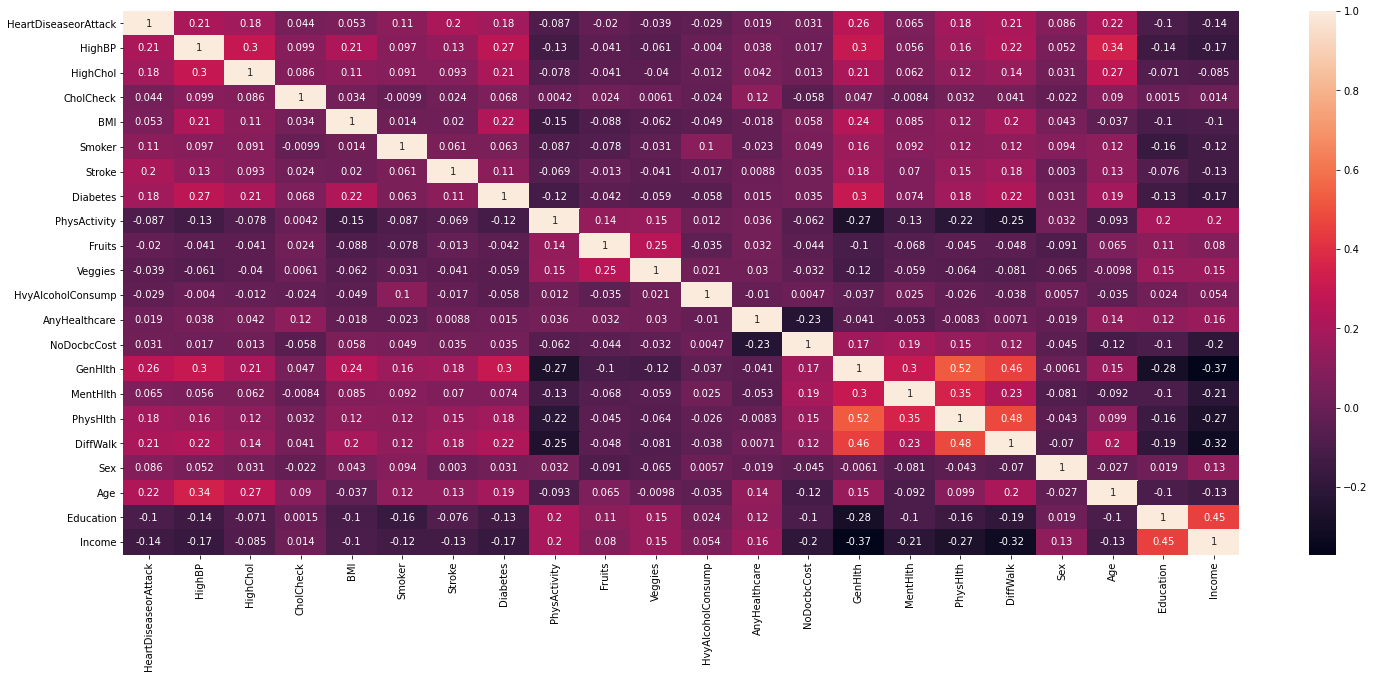

In [5]:
plt.rcParams["figure.figsize"] = (25,10)
sns.heatmap(df.corr(), annot = True)

In [6]:
c=df.corr()
corrs = dict(c["HeartDiseaseorAttack"])
chosen_feat = {key: value for (key, value) in corrs.items() if (value > 0.15 or value < -0.15)}
print(chosen_feat)

{'HeartDiseaseorAttack': 1.0, 'HighBP': 0.2093612106899254, 'HighChol': 0.18076535489001583, 'Stroke': 0.20300193999108826, 'Diabetes': 0.18027168633710597, 'GenHlth': 0.25838340865898274, 'PhysHlth': 0.18169753577593428, 'DiffWalk': 0.2127086952898351, 'Age': 0.22161763244757193}


In [7]:
def downsample(df:pd.DataFrame, label_col_name:str) -> pd.DataFrame:
    nmin = df[label_col_name].value_counts().min()
    return (df.groupby(label_col_name).apply(lambda x: x.sample(nmin)).reset_index(drop=True))


df=downsample(df,'HeartDiseaseorAttack')
y = df["HeartDiseaseorAttack"]
x = df.drop(["HeartDiseaseorAttack"], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Modelling

## Naive Bayes Classifier

In [8]:
nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)

In [9]:
nb_results = nb_model.predict(x_test)

In [10]:
print(classification_report(y_test, nb_results))

              precision    recall  f1-score   support

         0.0       0.70      0.75      0.73      4740
         1.0       0.74      0.69      0.71      4818

    accuracy                           0.72      9558
   macro avg       0.72      0.72      0.72      9558
weighted avg       0.72      0.72      0.72      9558



In [11]:
accuracy_score(y_test, nb_results)

0.7191881146683407

## Logistic Regression

In [12]:
logres = LogisticRegression(solver = "liblinear")
log_model = logres.fit(x_train, y_train)

In [13]:
log_results = log_model.predict(x_test)

In [14]:
print(classification_report(y_test, log_results))

              precision    recall  f1-score   support

         0.0       0.78      0.74      0.76      4740
         1.0       0.76      0.79      0.77      4818

    accuracy                           0.77      9558
   macro avg       0.77      0.77      0.77      9558
weighted avg       0.77      0.77      0.77      9558



In [15]:
accuracy_score(y_test, log_results)

0.7674199623352166

## XGB Classifier

In [16]:
xgb = XGBClassifier()
xgb_model = xgb.fit(x_train, y_train)

In [17]:
xgb_results = xgb_model.predict(x_test)

In [18]:
print(classification_report(y_test, xgb_results))

              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75      4740
         1.0       0.75      0.80      0.77      4818

    accuracy                           0.76      9558
   macro avg       0.76      0.76      0.76      9558
weighted avg       0.76      0.76      0.76      9558



In [19]:
accuracy_score(y_test, xgb_results)

0.7620841180163214

## Gradient Boosting Classifier

In [20]:
gbm = GradientBoostingClassifier()
gbm_model = gbm.fit(x_train, y_train)

In [21]:
gbm_results = gbm_model.predict(x_test)

In [22]:
print(classification_report(y_test, gbm_results))

              precision    recall  f1-score   support

         0.0       0.79      0.73      0.76      4740
         1.0       0.75      0.81      0.78      4818

    accuracy                           0.77      9558
   macro avg       0.77      0.77      0.77      9558
weighted avg       0.77      0.77      0.77      9558



In [23]:
accuracy_score(y_test, gbm_results)

0.7688847039129525

## LightGBM Classifier

In [24]:
lgbm = LGBMClassifier()
lgbm_model = lgbm.fit(x_train, y_train)

In [25]:
lgbm_results = lgbm_model.predict(x_test)

In [26]:
print(classification_report(y_test, lgbm_results))

              precision    recall  f1-score   support

         0.0       0.79      0.72      0.76      4740
         1.0       0.75      0.81      0.78      4818

    accuracy                           0.77      9558
   macro avg       0.77      0.77      0.77      9558
weighted avg       0.77      0.77      0.77      9558



In [27]:
accuracy_score(y_test, lgbm_results)

0.7685708307177234

## K Nearest Neigbors Classifier

In [28]:
knn = KNeighborsClassifier()
knn_model = knn.fit(x_train, y_train)

In [29]:
knn_results = knn_model.predict(x_test)

In [30]:
print(classification_report(y_test, knn_results))

              precision    recall  f1-score   support

         0.0       0.73      0.68      0.70      4740
         1.0       0.71      0.75      0.73      4818

    accuracy                           0.72      9558
   macro avg       0.72      0.72      0.72      9558
weighted avg       0.72      0.72      0.72      9558



In [31]:
accuracy_score(y_test, knn_results)

0.7170956267001465

# Visualization
## Comparison of Models - Important Features

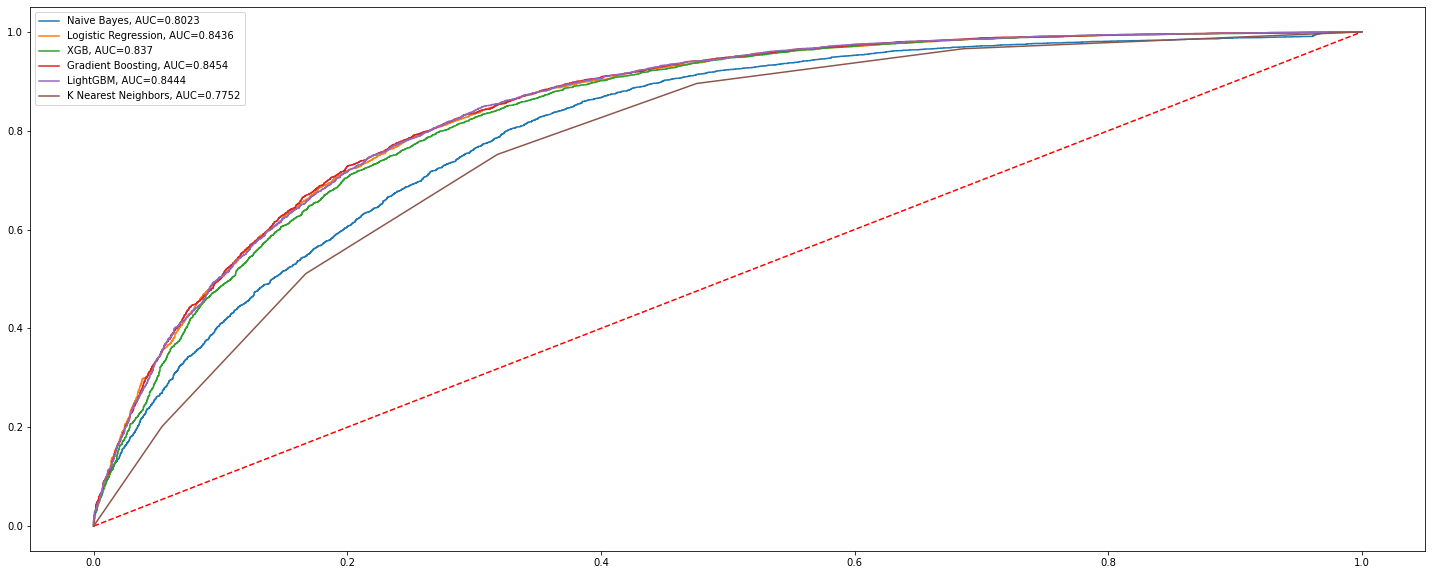

In [32]:
plt.figure(0).clf()

y_pred = nb_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Naive Bayes, AUC="+str(auc))


plt.plot([0, 1], [0, 1], "r--")
y_pred = log_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

y_pred = xgb_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGB, AUC="+str(auc))

y_pred = gbm_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

y_pred = lgbm_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="LightGBM, AUC="+str(auc))

y_pred = knn_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="K Nearest Neighbors, AUC="+str(auc))

#add legend
plt.legend()

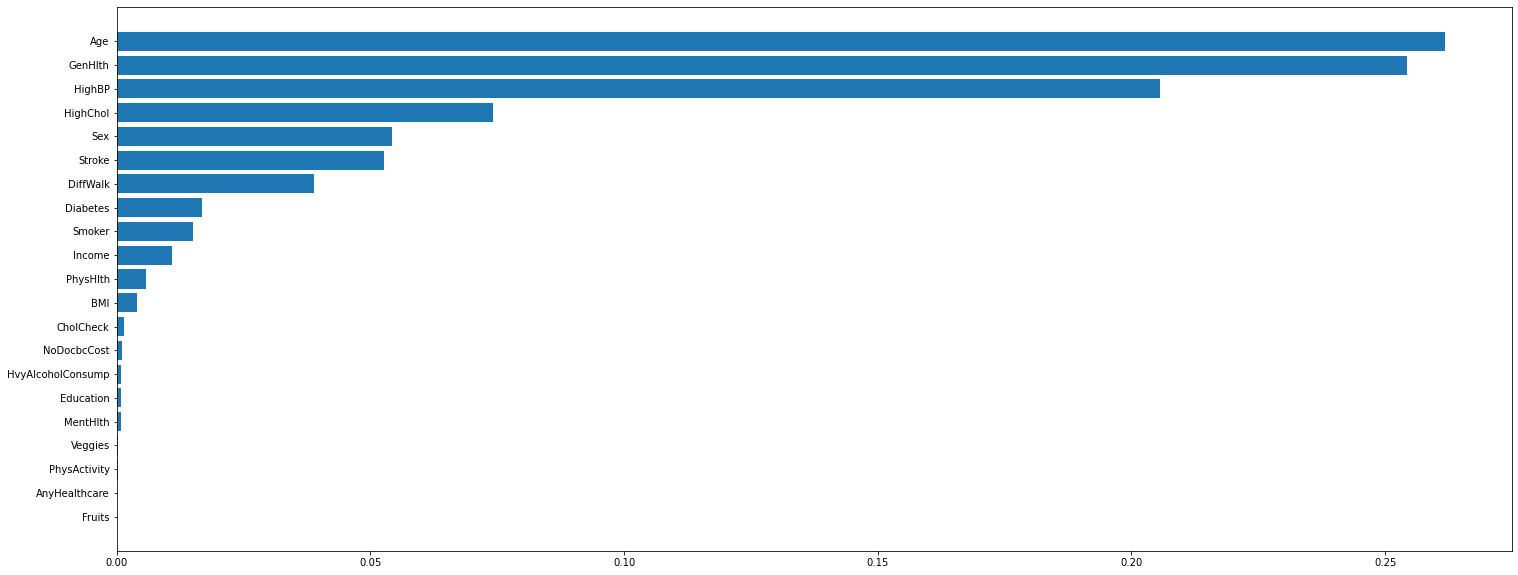

In [33]:
important_feats = gbm_model.feature_importances_
i = np.argsort(important_feats)

fig, ax = plt.subplots()
ax.barh(range(len(important_feats)), important_feats[i])
ax.set_yticks(range(len(important_feats)))
_ = ax.set_yticklabels(np.array(x_train.columns)[i])